In [3]:
#윤리적 고민과 규제 도전
# -딥페이크, AI목소리

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time


driver=webdriver.Chrome()
driver.get("https://www.youtube.com/")
search_box = driver.find_element(By.NAME, 'search_query') # 검색창을 찾은 후에,
search_box.send_keys('AI 노래 저작권') # Python이라고 치고,
search_box.submit() # 검색 버튼 누름
driver.find_element(By.XPATH,'//*[@id="filter-button"]/ytd-button-renderer/yt-button-shape/button').click()
driver.find_element(By.XPATH,'/html/body/ytd-app/ytd-popup-container/tp-yt-paper-dialog/ytd-search-filter-options-dialog-renderer/div[2]/ytd-search-filter-group-renderer[1]/ytd-search-filter-renderer[5]/a/div/yt-formatted-string').click() # 올해
#driver.find_element(By.XPATH,'/html/body/ytd-app/ytd-popup-container/tp-yt-paper-dialog/ytd-search-filter-options-dialog-renderer/div[2]/ytd-search-filter-group-renderer[1]/ytd-search-filter-renderer[4]/a/div').click() # 이번 달




scroll_script = "window.scrollBy(0, window.innerHeight);"

# 20초 동안 매 초마다 스크롤
for _ in range(1000):
    driver.execute_script(scroll_script)
    time.sleep(0.1)
    
result=driver.find_elements(By.ID, "video-title")
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [3]:
title_list = soup.select("#video-title")
title=[]
for i in range(len(title_list)) :
    if title_list[i].get("title") :
        title.append(title_list[i].get("title"))

In [4]:
import re
import pandas as pd
time=[]

for i in range(len(title_list)) :
    pattern = re.compile(r'(\d+)\s*(개월|년|일)\s*전')
    matches = pattern.search(str(title_list[i]))
    try :
        time.append(matches.group())
    except :
        pass

result=pd.Series(time)

In [5]:
for i in list(result.values):
    if '년' in i :
        result.replace(i,int(i.split('년')[0])*365,inplace=True)
    elif '개월' in i :
        result.replace(i,int(i.split('개월')[0])*30,inplace=True)
    elif '일' in i :
        result.replace(i,int(i.split('일')[0]),inplace=True)


In [6]:
result.info()

<class 'pandas.core.series.Series'>
RangeIndex: 519 entries, 0 to 518
Series name: None
Non-Null Count  Dtype
--------------  -----
519 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB


In [7]:
# "올해"버튼 클릭했을 때
test = result.value_counts().sort_index(ascending=False)
add=test[test.index < 30].sum(axis=0)
test.drop(test[test.index < 30].index,inplace=True)
test[0]=add
x=test.index
y=test.values

In [91]:
test

330     33
300     15
270     16
240     68
210     95
180     63
150     37
120     25
90      19
60      25
30      29
0      107
Name: count, dtype: int64

In [81]:
# "이번 달"버튼 클릭했을 때
x=result.value_counts().sort_index(ascending=False).index
y=result.value_counts().sort_index(ascending=False).values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


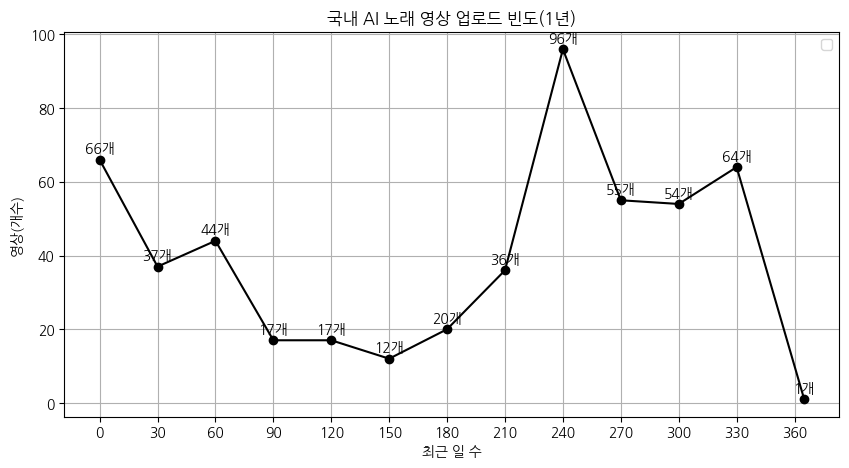

In [8]:
from matplotlib import pyplot as plt
import koreanize_matplotlib


plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', color='black')
plt.title('국내 AI 노래 영상 업로드 빈도(1년)')
plt.xlabel('최근 일 수')
plt.ylabel('영상(개수)')
plt.grid(True)
plt.legend()
plt.xticks(range(0,390,30),range(0,390,30))
# 주요 데이터 포인트에 텍스트 추가
for i, txt in enumerate(y):
    plt.annotate(f'{txt}개', (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


In [9]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image

def make_wordcloud(title_list, stopwords, word_count):
    okt = Okt()
    sentences_tag = []
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    tag_dict = dict(tags)
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    path = r'c:\Windows\Fonts\malgun.ttf'
    img_mask = np.array(Image.open('musical-note.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                      background_color="white", max_font_size=200,
                      repeat=True, colormap='plasma',
                      mask=img_mask, collocations=False, max_words=50)

    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

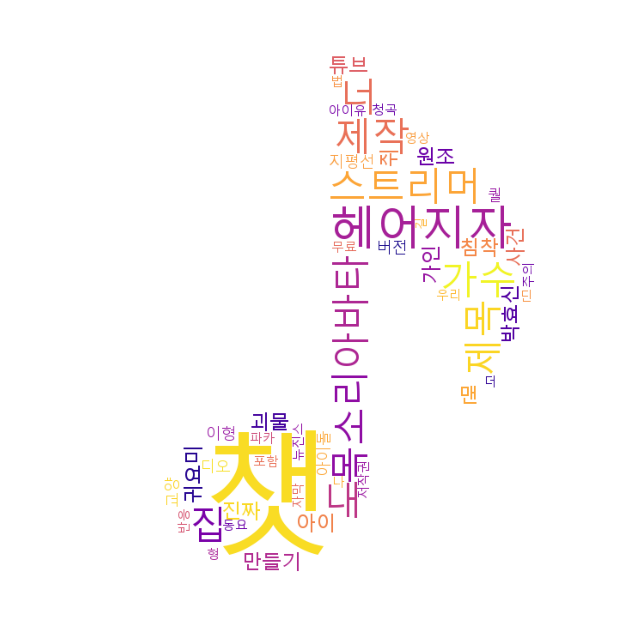

In [116]:
stopwords = ['AI','음악','노래','작곡','커버','곡','말','월드컵','로','이','가사','위','옥','사랑','작사']
make_wordcloud(title, stopwords, 100)

In [117]:
title

['최초공개) 박효신AI가 부르는 "거리에서"  (가사/고퀄) | AI커버',
 '감스트 "AI 커버 노래 월드컵" 개신기하네.. + 감스트 AI커버 [23.8.15 감스트의 월드컵]',
 '스타크래프트 시즈탱크 AI - 서울의 달 (김건모)',
 '자작곡 ㅣ AI빅뱅 - Falling Down',
 '자작곡ㅣAI빅뱅 - 너에게로 (To You)',
 'AI 괴물쥐  - 헤어지자 말해요',
 '🖤 [𝐏𝐥𝐚𝐲𝐥𝐢𝐬𝐭] 기다리다 못해 지쳐서, 딘을 만들어버린... 딘(DEAN) AI 플레이리스트',
 '감스트AI 노래 월드컵 폼 미쳤다!!ㅋㅋ',
 '침착맨 - Stay with me (Official MV)',
 '[PLAYLIST] 낭만있는 스트리머들의 AI 커버 13곡을 한번에 #1',
 '박재정 노래 빼앗는 아이유 - 헤어지자 말해요 ㅣ ai cover',
 '나히다 ai 커버) 너에게 난, 나에게 넌',
 'AI Playlist 이 세상 모든 노래를 아이유 목소리로 듣고 싶어📀 [AI Cover]',
 '스타크래프트 메딕 AI - 8282 (Feat. 다비치)',
 '신형만(짱구 아빠)  - 형(AI Cover)',
 '트럼프가 랩하고 칸예가 오르막길 부르는 세계관 | 베스트 AI 커버 음악 월드컵',
 '🔴소름주의🔴시청자 모두가 놀란 김재원 AI보컬 콘테스트ㄷㄷ',
 '동수칸의 AI 노래 커버를 들은 스트리머들의 반응',
 '이 노래 다들 아시죠? AI박효신의 "삭제"',
 '[IU]아이유 (feat.G-DRAGON) - 한 여름밤의 꿀 ai Cover (추천곡) 고퀄주의',
 '해외에서 난리난 AI로 5분만에 노래를 만들어서 돈을 버는 방법 | 유튜브 자동화',
 '기계에게 영혼을 빼앗긴 스트리머 모음집 | 베스트 AI 커버 음악 월드컵(스트리머 Ver.)',
 'AI음악으로 수익창출, 진짜일까? - 저작권의 비밀',
 'AI무현 - 헤어지자 말해요',
 'Ai 아루 Cover. / 헤어지자 말해요 - 박재정',
 '감동적인 스트리머 AI 커버 월드컵'

In [1]:
title=['최초공개) 박효신AI가 부르는 "거리에서"  (가사/고퀄) | AI커버',
 '감스트 "AI 커버 노래 월드컵" 개신기하네.. + 감스트 AI커버 [23.8.15 감스트의 월드컵]',
 '스타크래프트 시즈탱크 AI - 서울의 달 (김건모)',
 '자작곡 ㅣ AI빅뱅 - Falling Down',
 '자작곡ㅣAI빅뱅 - 너에게로 (To You)',
 'AI 괴물쥐  - 헤어지자 말해요',
 '🖤 [𝐏𝐥𝐚𝐲𝐥𝐢𝐬𝐭] 기다리다 못해 지쳐서, 딘을 만들어버린... 딘(DEAN) AI 플레이리스트',
 '감스트AI 노래 월드컵 폼 미쳤다!!ㅋㅋ',
 '침착맨 - Stay with me (Official MV)',
 '[PLAYLIST] 낭만있는 스트리머들의 AI 커버 13곡을 한번에 #1',
 '박재정 노래 빼앗는 아이유 - 헤어지자 말해요 ㅣ ai cover',
 '나히다 ai 커버) 너에게 난, 나에게 넌',
 'AI Playlist 이 세상 모든 노래를 아이유 목소리로 듣고 싶어📀 [AI Cover]',
 '스타크래프트 메딕 AI - 8282 (Feat. 다비치)',
 '신형만(짱구 아빠)  - 형(AI Cover)',
 '트럼프가 랩하고 칸예가 오르막길 부르는 세계관 | 베스트 AI 커버 음악 월드컵',
 '🔴소름주의🔴시청자 모두가 놀란 김재원 AI보컬 콘테스트ㄷㄷ',
 '동수칸의 AI 노래 커버를 들은 스트리머들의 반응',
 '이 노래 다들 아시죠? AI박효신의 "삭제"',
 '[IU]아이유 (feat.G-DRAGON) - 한 여름밤의 꿀 ai Cover (추천곡) 고퀄주의',
 '해외에서 난리난 AI로 5분만에 노래를 만들어서 돈을 버는 방법 | 유튜브 자동화',
 '기계에게 영혼을 빼앗긴 스트리머 모음집 | 베스트 AI 커버 음악 월드컵(스트리머 Ver.)',
 'AI음악으로 수익창출, 진짜일까? - 저작권의 비밀',
 'AI무현 - 헤어지자 말해요',
 'Ai 아루 Cover. / 헤어지자 말해요 - 박재정',
 '감동적인 스트리머 AI 커버 월드컵',
 '라디유의 킬링보이스를 노래로![AI노래]ㅣ사건의 지평선,베델기우스,Cupid 등',
 '아이유(IU) - 어디에도 [가사 포함] (AI Cover)',
 '뱅크-가질수없는 너 (프레디 머큐리 AI 커버)',
 '김동률AI - 헤어지자 말해요 (고퀄주의)',
 'AI노래만들어서 월 백만원 연금타기 I  수노에이아이와 챗지피티로 시작하는 음악제작 및 수익화 / SUNO AI perfect guide',
 '가수 옥냥씨는 나가있어｜스트리머 AI 노래 월드컵',
 '(고죠 사토루 AI Cover) 푸르름이 사는 곳 : 주술회전 - 회옥・옥절 OP',
 '풀버전 - AI용준좌의 “헤어지자 말해요“',
 'AI 작곡 30초컷! 페이스북 메타가 만든 AI 음악 프로그램 MusicGEN 눈 앞에서 곡 만들어드립니다! 일단 듣고 가세요~!!! 유튜브 #무료음악, 저작권, 싹다 무료ㅋㅋㅋ',
 'AI 괴물쥐 - 오래된 노래',
 '옥냥이 ai 월드컵 / RoofTopCat AI Songs Cover World Cup',
 '[AI커버] 박명수 - New Jeans | 뉴진스 - New Jeans AI COVER',
 '전화노래방실시간맛집  #AI자동노래키 #무료악보  0214',
 'DEAN(딘) - Newjeans (Cover) AI',
 '요즘 화제인 애니 오프닝곡 | Bling-Bang-Bang-Born - Creepy Nuts | 마슐 2기 OP [가사/해석/AMV]',
 '하다하다 배틀크루저AI까지 ㅋㅋㅋ',
 'Drama가 ITZY 노래였다면 (ai cover) #shorts',
 '윈터 - 사랑하지 않아서 그랬어 (원곡:임한별) | aespa winter cover',
 '디오 & 백현 (EXO) - TO.X│태연 원곡│AI COVER│가사포함│키내림│신청곡│#디오 #dokyungsoo #백현 #baekhyun #엑소 #exo #태연 #aicover',
 '『견자희』 AI 스트리머 월드컵 ㅠㅠㅠㅠ 미쳤다 미쳤어 ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ',
 '【헤어지자 말해요】네루 AI Cover (원곡 : 박재정) [블루 아카이브]',
 '벌쳐 AI -  잘못된 만남 (할미넴) / 전국 노래자랑',
 '16년 박효신을 학습한 AI - "헤어지자 말해요" (최다요청곡**)',
 'AI 괴물쥐 - 겨울을 걷는다 (윤딴딴)┃Ai cover',
 '진짜보다 더 진짜같은 Ai 노래...ㄷㄷ',
 '오르막길- 프레디 머큐리(AI COVER)',
 '윤하(YOUNHA) - 사건의 지평선 | AI Cover - 텐도 아리스 天童 アリス (싱크 완화)',
 'AI 랄로 - 흰 눈┃Ai cover',
 '(호시노 아이 AI COVER) 아이돌 - YOASOBI',
 '[나의 아저씨ost] 별이 된 그를 기리며 "AI박효신 - 어른"',
 '임재범 - 심(心) │ DK(디셈버) 버전 얀 원곡 │ Yim Jae-beum (AI voice cover)',
 '작곡한다고 소개하더니 배경음악용?? 현실적으로 사용 가능한 작곡AI 소개합니다.',
 'AI침착맨이 리마스터한 고백♪ - 델리스파이스',
 '아이유IU - 큐피드 (Feat. 드레이크) | AI Cover',
 '🎹 디오 (EXO) - Get A Guitar│라이즈 (RIIZE) 원곡│AI COVER│가사포함│신청곡│#디오 #도경수 #dokyungsoo #riize #라이즈 #aicover',
 '(스쿠나 AI cover) SPECIALZ : 주술회전 시부야 사변 OP',
 "백현 BAEKHYUN 'To. X' 태연 TAEYEON (AI Cover)",
 '침착맨 - 노래방에서 (ON THE K : LIVE | AI COVER | 원곡 장범준)',
 '갈때까지 가버린 AI 근황',
 'DEAN(딘) - Newjeans (Cover) AI',
 'AI남도일 - 헤어지자 말해요',
 '내 목소리로 만든 AI 노래 수준🤣',
 '저작권 문제없는 AI음악 만들어 수익창출까지 하는 방법',
 '오스틴 AI - 헤어지자 말해요 (고퀄주의)',
 'AI메딕 누나 - 퍼펙트 나잇 (르세라핌)',
 '괴물쥐 - 그런 일은 Cover (원곡: 박화요비)',
 '박효신(AI) - 오래된 노래 (김동률)',
 'AI 도파 X AI 랄로 X AI 괴물쥐 (feat.폴킴) - 파도┃Ai cover',
 '[𝙋𝙡𝙖𝙮𝙡𝙞𝙨𝙩] DEAN(딘) X AI 커버 플레이리스트 모음 | 권혁 AI Cover 플리 2',
 'AI한테 작곡을 시켜보았더니? ㅋㅋㅋㅋㅋ',
 'Ditto를 10CM버전으로 만들어버림 (🐶신기함) #shorts #ai커버',
 'AI 노래 만들어서 자면서도 돈 버는법 (자동수익형 부업추천)',
 '지드래곤(G-DRAGON) - 아름다워 | 창모 CHANGMO | AI COVER',
 '해외에서 난리난 AI 음악으로 유튜브 수익 창출 조건 달성하기',
 '백예린의 "예뻤어" AI cover Ver. | DAY6 - "You Were Beautiful" Yerin Baek AI cover ver. [lyrics]',
 'AI 파카 - 노래방에서┃Ai cover',
 '뉴진스 하니 - 사랑을 전하고 싶다든가 (아이묭) AI 커버',
 '옥냥이 ai 월드컵 / RoofTopCat AI Songs Cover World Cup',
 '프레디 머큐리 - 내 손을 잡아',
 '"어머니!!!" AI시즈탱크 - 이등병의 편지',
 'AI노래 vs 버츄얼 노래 #rose  #shorts #아이돌',
 'AI 괴물쥐 - SEVEN(feat AI 파카)',
 'SUNO AI 활용하여  음악과 영상을 만들어보기: 짧은 시간에 노래와 영상 만들기',
 'AI 괴물쥐 - 우리의 꿈',
 '미미미누 - 헤어지자 말해요(AI Cover)',
 "아이유 - New future ('달빛천사' OST) (Ai cover)",
 '나얼AI가 부르는 "시든 꽃에 물을주듯" (가사/고퀄) (feat. 방성우-울산나얼)',
 '고맙소 (조항조) - 임영웅 AI 커버곡',
 '🎹 디오&백현 (EXO) - SUGARCOAT│NATTY 원곡│AI COVER│가사포함│ 키내림 │#디오 #백현 #엑소 #exo #sugarcoat #natty #aicover',
 '레전드뿐인 AI 스트리머 커버곡 월드컵 ㄷㄷㄷ',
 '[신청곡] 전성기 김경호 - 천년의 사랑 (박완규 원곡) AI 커버 (가사 자막)',
 '《서울의 봄》 NG 내는 장면도 후덜덜한 전두광.. 아니 황정민ㄷㄷ #shrots',
 '노래하는 AI저씨 [마카오톡 하이라이트]',
 'AI 백예린 플레이리스트 모음',
 '이수 Ai - 헤어지자 말해요 2 [박재정/고퀄 Ai 커버]',
 '스펀지밥 - 사랑..그게 뭔데(AI)',
 '진짜보다 더 진짜같은 Ai 노래...ㄷㄷ',
 '디오(DIO)- 박재정 헤어지자 말해요_ AI Cover, 죠죠',
 'NewJeans 하니 - 어떻게 지내 (AI Cover)',
 '찬영이랑어울리는노래헤쳐모여 | 앤톤 AI Cover',
 '치유음악으로 월1700 패시브인컴 만들기 (힐링)',
 '죠타로 & 디오- Lemon [Kenshi Yonezu]_ 죠죠 AI Cover',
 '보통 AI 로.. 노래 만들면 멋진거 아냐..? - 비가 오는 날엔',
 '딘(Dean) - To. X (태연) (AI Cover)',
 "AI 아이유×박효신 - 시대를 초월한 마음 Full Ver. ('이누야샤' OST) (Ai cover)",
 '"음색이 중요한 이유" AI임재범 - 보고싶다',
 '팜하니 (뉴진스) - 예뻤어 (AI Cover)',
 '작곡AI AIVA 따라해봅시다! 😎',
 '우리말로 노래 만들어 주는 AI _ 무료로 바로 만들어보자 SUNO ai',
 '03년 박효신 - 헤어지자말해요(업그레이드버전) - 3분이후 고침ㅋㅋ',
 'Miiro - 계절범죄 (feat. 새빛) (지누, 김뿡, 탬탬버린 AI Cover)',
 'Ditto를 10CM버전으로 만들어버림 (🐶신기함) #shorts #ai커버',
 'HAECHAN - To. X (AI Cover)',
 '초간단 AI 커버 곡 만드는 방법 (100% 무료!) | 블랙핑크 제니가 부르는 에스파 Drama? AI 커버 노래 만들기 [AI 디지털 콘텐츠 강의]',
 '[신청곡] 전성기 김경호 - 천년의 사랑 (박완규 원곡) AI 커버 (가사 자막)',
 '[세로] 디오 & 수현 - Rewrite The Stars [더 시즌즈-악뮤의 오날오밤] | KBS 230922 방송',
 '뽀로로 극장판: 슈퍼스타 대모험ㅣAI 아이돌 ‘아이원’ [완벽한 나야] 뮤직비디오 공개ㅣPororo BAND MV',
 '거북이 - 비행기 | AI Cover - 호두 KR / HuTao / 胡桃',
 'AESPA - GODS (AI Cover)',
 '머독 - Hello Mr. my yesterday(AI Cover)',
 '초면에 오크냥이님.. 맨날 노래 불러주세요!!!! 제발요ㅠㅠ!!!!! [스트리머 옥냥이님의 Ai 노래 이상형월드컵]',
 '188cm 100Kg 넘는 알파메일인데 노래까지 잘해버리면 어떡하냐고',
 'AI 괴물쥐 - Heaven',
 '팜하니 (뉴진스) - 첫사랑 (AI Cover)',
 '진짜 말도 안 되는 미친 보컬 AI ;;; 이 정도 노래 퀄리티 면 진짜 음원 판매해도 손색없어요!',
 '“음색이 만드는 차이” AI임재범 - 헤어지자 말해요',
 'レオ(Leo) 커버 | AI 옥냥이',
 "챗GPT같은 AI로 저작권 없는 음악 만들기 / 챗GPT로 '벚꽃연금', 가능할까",
 'Baddie가 NCT 127 노래였다면 (AI cover) #shorts #nct127',
 '감쪽같은 AI 커버 노래…저작권 문제는 없는지 알아봄｜크랩',
 'AI 랄로 - 축가 (AI cover)',
 'AI 도파 - 당년정 當年情  (영웅본색 OST)┃Ai cover',
 'AI 괴물쥐 - 새벽에 걸려온 너의 전화는',
 '디오(DIO)_ 윤종신 - 좋니(YOON JONG SHIN-Like it)_ AI Cover, 죠죠',
 '이 AI는 무료로 노래를 만들어 줍니다',
 '| AI가 작곡한 힐링 음악으로 자동화 수익 만들기 | 수면 명상 음악으로 패시브 인컴 [놀컴 프로젝트]',
 '메딕과 SCV의 가슴 저린 듀엣곡',
 '다주x초홍x물쥐x칸x삼식x명훈x돌리x포셔 AI Cover - Butterfly "국가대표 OST"',
 '[이상형 월드컵] 머독 Ai 노래 이상형 월드컵',
 '작곡 Ai로 10분만에 곡을 만들어보면?',
 '[요청곡] 🎧 폴블랑코 보단 임재범의 그런일은이지!! - 그런일은 (박화요비) by 임재범 (Yim Jae Beum)',
 '【무료+초간단】 - 내 목소리로 AI커버 만드는법. 코랩 없이 AI커버 만들기',
 '수피 ai cover (경서 - 밤하늘의 별을)',
 '[AI커버] SCV - 이등병의 편지 #스타크래프트2',
 '반응이 다른 신흥강자 AI 노래 커버 월드컵',
 'Piano Man 커버 | AI 옥냥이',
 '이제는 나도 벚꽃 연금! 무료 작곡 A.I 등장 - Suno A.I 사용법(곡 판매를 위해선 유료 가입 필요)',
 '옥냥이님 AI 커버 월드컵, 옥냥이님이 울린 여자 +1 입니다 ( 64강 풀버전)',
 '【 탬탬버린AI | ver.버린 】 사랑을 전하고 싶다든가(愛を伝えたいだとか) - 아이묭(Aimyon,あいみょん) | AI Cover',
 '너 침컬로이드 몰라?   【침착맨AI - 기억의 습작】',
 '03년 박효신이 학습된 AI가 부르는 "못해" - 포맨 (가사/고퀄)',
 '【 AI탬탬지누】  잔소리 - 아이유 | AI Cover',
 'AI 커버에 대한 가수들의 반응',
 '진짜 말도 안 되는 미친 보컬 AI ;;; 이 정도 노래 퀄리티 면 진짜 음원 판매해도 손색없어요!',
 '마로니에 - 칵테일 사랑 (이춘향, 코렛트, 김뿡 AI Cover)',
 '극강의 소년미 | ashen wolf | JPOP cover 𝐏𝐥𝐚𝐲𝐥𝐢𝐬𝐭',
 'Ai 아루 Cover / Monologue(모놀로그) - 테이',
 'AI가 작곡·편곡에 노래까지…저작권 문제는 여전 [9시 뉴스] / KBS  2023.07.02.',
 '[제이]조이- 안녕 (Ai 푸리나 .ver) [AI 노래]',
 '【 탬탬버린AI | ver.탬탬 】 귀여워서 미안해(VER. 한국어) - 주르르 (JURURU) [가사 포함] | AI Cover',
 'TAEYEON - GODS (AI COVER)',
 '소몰이 창법 박효신이 부른 - 心 (심) [AI COVER]',
 '침착맨까지 학습해버린 AI - 두사람♬',
 '수피 ai cover (윤하 - 사건의 지평선 도입부)',
 '디오 (EXO) - 예뻤어│DAY6 (데이식스) 원곡│AI COVER│가사포함│신청곡│#디오 #도경수 #dokyungsoo #엑소 #exo #day6 #데이식스 #aicover',
 '1분만에 AI로 아리아나 그란데 커버곡 만들기 #shorts #뉴진스 #brunomars',
 'AI 도파 - 하늘에서 다시 오백년을 빌려 向天再借五百年 | AI Cover',
 '[Blue Archive AI] 민중의 노래 - 레미제라블 (Do You Hear the People Sing)  / 미노리(Minori) AI Cover',
 '흑화해버린 김하온 ㄷㄷ',
 'DEAN(딘) x NewJeans(뉴진스) - Hype Boy (A.I. cover)',
 '[Cover. AI 시로코] 헤르쯔 아날로그(Herz Analog) - 여름 밤',
 '전두길 AI - 헤어지자 말해요 (고퀄주의)',
 '스트리머 AI 커버 이상형 월드컵 ㅠㅠ 진짜 신기해 8ㅅ8',
 '猫(Neko) 커버 | AI 옥냥이',
 "제트 목소리로 부르는 Can't Slow Me Down (AI Cover)",
 'AI 노래 대결 EP.106 (2024.01.07)',
 '침착맨(ChimChakMan)의 킬링보이스를 Ai 로! - 원피스 오프닝 우리의 꿈',
 '【 AI탬탬버린 | ver.2 버린 】 강풍 올백 (強風オールバック) 한국어ver. | AI Cover',
 '디오 (EXO) - TO.X│태연 원곡│AI COVER│가사포함│키내림│신청곡│#디오 #도경수 #dokyungsoo #엑소 #exo #태연 #taeyeon #aicover',
 '[최후의 아이] 식량소비 - 아이놈(アイノム) | 원곡 : YOASOBI - 아이돌(アイドル)',
 'ai 노래 커버 프로그램 (무료 사이트)- 5분 만에 커버곡 만들기',
 '인공지능아 더 단단하게 해줘',
 '메카새봄에 푹 빠져버린 동료들..ㅠ (AI 노래커버)',
 '와.. 챗GPT 작곡 퀄리티 지렸다ㄷㄷ 10CM 권정열님과 함께하는 ⚒AI공작소⚒',
 '[AI커버] 박명수 - 큐피드 | FIFTY FIFTY - CUPID AI COVER',
 '헤픈 우연 - 헤이즈(Heize) | AI Cover - 우시오 노아 / 生塩ノア / Ushio Noa',
 '파카랑 말투(웃음소리) 똑같은 칸나',
 'BJ타요(AI cover) - Heaven(콘서트 ver.)',
 'AI 랄로 - 까만안경┃Ai cover',
 '스펀지밥 - 헤픈우연(AI)',
 'DIO가 되어 (먼지가 되어)',
 '옥며든 옥냥이님 AI 커버곡 월드컵..(64강 Full ver.)',
 '히틀러 - 독일의 노래(AI Hitler - Deutschlandlied) _AI cover',
 '내 목소리로 노래하는 AI 만들기',
 '호두 KR(HUTAO KR) - 사건의 지평선 [AI-Cover]',
 'Kanye West - 오르막길 (Ai Cover)',
 '고길동-포장마차(AI)',
 'AI가 작곡,작사,노래,영상까지 - 외계인 커피 (Alien Coffee)  / AI작곡, AI작사, AI노래, AI영상, AI음악, AI팝송, #ai작곡, #ai작사, #ai노래',
 'AI코트 VS 노래하는코트  개웃김 ㄹㅇ ㅋㅋㅋㅋㅋㅋㅋ',
 '[ 23.08.02 귀호강 옥냥이님 ai노래월드컵]',
 'AI 음악 생성 Sound draw 활용해서 유튜브 수면음악 채널 만들기 (AI로 돈버는법 EP.1)',
 '[ 악녀 AI 노래 ]  사랑을 전하고 싶다든가(愛を伝えたいだとか) - 아이묭(Aimyon,あいみょん)',
 '[StarCraft II] 안재욱 - 친구(朋友)  \\ (AI cover - Jim Raynor, Tychus J. Findlay, Matt D. Horner)',
 '🥫 AI로 만든 래퍼들의 노래! 곧 래퍼들도 대체를?... 🤖',
 '내가 죽으려고 생각한 것은 Cover | AI 옥냥이',
 '미야) 괴물쥐 앞에서 Ai 물쥐 노래 듣기 ㅋㅋㅋ',
 '혜성 - 윤하(Younha/ユンナ) | AI Cover - 하야세 유우카 / 早瀬ユウカ / Hayase Yuuka',
 'AI 태연 - 사건의 지평선 (AI TAEYEON - Event Horizon) [RVC WebUI]',
 '【최애의 바위】 OP MV버전 ㅣ MC무현 "아이돌"  By Isekai President',
 '낭만 고양이 - 체리필터 | AI Cover - 하야세 유우카 / 早瀬ユウカ / Hayase Yuuka',
 '롤체 하면서 듣는 AI 타요 플레이리스트 [AI Cover]',
 'Chat GPT 한테 노래를 만들어 달라고 해보았습니다 ㅋㅋㅋㅋ',
 '[OLD] [Thanks to] with 윤하 | AI Cover - 텐도 아리스 天童 アリス',
 '[성시경 노래] 51. アイ l Sung Si Kyung Music',
 '[AI] KARINA & WINTER - DANGEROUSLY || COLOR CODED LYRICS HAN/ROM/ENG/가사',
 '메카새봄 - 봄던타임즈 AI cover',
 '팜하니-애상 (AI COVER) Full Quality',
 '【 AI탬탬버린 | ver.2 버린 】 스티커 사진 - 21학번 | AI Cover',
 '[메구밍 AI] YOASOBI - 밤을 달리다(AI COVER)',
 '[교양] 스맵-사랑의바보(AI노래)',
 '고길동-좋니(AI)',
 'AI 멋사 X 너불 X 악어 - 아로하',
 'AI 랄로 - 코이 (恋)┃Ai cover',
 '간단한 AI 커버송 제작법 + 음악산업에서의 활용법',
 'AI로봇한테 뺨맞고 경련 일어난 남자 #AI #로봇 #shorts',
 'Marigold 커버 | AI 옥냥이',
 "죠죠의 기묘한 '아이돌'(Original)- AI Cover[MAD/AMV]",
 '[김재원 AI노래 콘테스트 2위 감사합니다] 김재원 - 돌덩이 Cover',
 '솔직히 난 오타니 좀 별로인 거 같은데? #shorts',
 "좋아하는 노래를 '내 가수' 목소리로…AI 커버 법적 책임은? (자막뉴스) / SBS",
 '[메구밍 AI] YOASOBI - 아이돌(최애의 아이OP)(AI COVER)',
 '무료일 때 빨리 해보세요!!! AI 커버노래 초단간하게 만드는 방법',
 '오래된 노래_ 스탠딩 에그 - 강원기 디렉터│AI Cover',
 '정재혁 AI - 헤어지자 말해요 (고퀄주의)',
 '스트리머 AI 커버 월드컵 편집판',
 '【 탬탬버린AI | ver.버린 】  최애의 탬탬 아이돌(アイドル) - YOASOBI (최애의아이OP) | AI Cover',
 '트순이 경력 6년차 버튜버 【스트리머 AI 노래 월드컵 풀버젼 (128강 full. ver)】',
 'AI 파카 - 좋지 아니한가┃Ai cover',
 'It Runs Through Me 커버 | AI 옥냥이',
 '🎧인공지능이 만들고 사람이 부르는 노래! 어떻게 만드는지? 그리고 어떤 노래인지 한 번 들어보실래요? | 챗GPT 작곡, 음악 AI 작사, 인간 가창\U0001fa84',
 '옥냥이님 AI 노래 커버 달맞이꽃 리액션과 수치가 가득한 고로시... 【카페 탐방】',
 '원피스OST - 밀짚모자해적단 AI커버곡',
 'BADDIE - AESPA AI COVER',
 'AI로 윤석열 이재명 안철수를 2077년의 사이버펑크로 보내보았다 #1',
 '가수 목소리 학습시켜 AI 노래하면 이건 누구 노래? #shorts',
 'AI램램 - 오래된 노래 Cover.',
 '저세상 내꺼하는법 AI 커버 반응 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'AI 파카 - 내 머리가 나빠서┃Ai cover',
 '[Cover. AI 유우카] 윤하 - 사건의 지평선',
 '뉴진스[하니]- 사랑은 은하수 다방에서(AI COVER) Crazy Quality',
 '230814/2부 [월드컵] 스트리머 AI 커버 노래 월드컵 128강',
 "노돌리 - It's Beginning To Look A Lot Like Christmas ( AI cover )",
 'DIO의 윤하 - 사건의 지평선 (DIO AI Cover)',
 '내 노래로 AI커버를? 삼식의 나는 반딧불을 들은 원곡자의 반응',
 '아이유 노래를 내가 부른다면? 내 목소리로 AI Cover 데이터셋 제작하는 법',
 '노래 AI가 진화하는 과정',
 '[문화연예 플러스] 그래미 "AI로만 만든 노래, 상 못 받는다" (2023.06.20/뉴스투데이/MBC)',
 "[자막뉴스] '소름 쫙' AI에 대해 질문했더니...로봇의 섬뜩한 답변 / YTN",
 '[빈자리] AI로 만든 발라드 장르 #음악 #노래 #music #ai노래 #ai #sorts 풀영상 링크는 댓글에 있습니다',
 'AI 도파 - 포청천 包青天 | AI Cover',
 '달맞이꽃(ツキミソウ) Cover | AI 옥냥이',
 '대기업은 AI버튜버의 노래를 두려워 합니까?',
 '춤 설명 듣고 노래 맞히기 [총 20곡] [신서유기 뿅뿅지구오락실 혜미리예채파 놀라운토요일]',
 'AI춘자&진격캐넌 - 잔소리(Short Version)',
 'Ai로 [노래장르] 가 로봇이된다면? 입력해보았다.',
 '양아지 - 사건의 지평선 (AI COVER)',
 "SUGA & JIMIN (BTS) - 'See You Again' [AI Cover] (Color Coded Lyrics)",
 '블랙핑크(BLACKPINK) ver. 에스파(aespa) DRAMA (𝘼𝙄 𝘾𝙤𝙫𝙚𝙧) 🔥',
 '레전드 그 자체...바람의 노래 - 김광석(조용필,소향)[AI COVER]',
 '【 침착맨AI 】 경박한 너 사용법 | AI Cover',
 '🌙아련했던 그 시절 애매모호 짝사랑🌙: Tomioka Ai-Good bye bye (eye to eye) (2023) [가사해석/번역/자막]',
 '우왁굳 AI커버- 다시 사랑한다 말할까',
 'AI 작사, AI 작곡, AI 노래 ( AI lyrics, AI composition, AI vocal )',
 '분홍신 (푸리나 Kr AI cover)',
 '귀요미 사랑튜브!! 원조 AI노래 11집 AI동요 섬집아기 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT K-Pop',
 '[2023/ 07/ 26 다시보기] AI노래 월드컵 + 폴가이즈 1등하면 12만원을 준다고?',
 'Ai에 [국가]와 [유령]을 입력해보았다.',
 '#챗GPT 활용! AI로 음악 만들기! 왕초보 가능! 1분이면 노래 한곡 뚝딱!',
 '피닉스박 스트리머 AI 노래 월드컵 - 2023.07.22 (2)',
 '[AI] 케인 - 나를슬프게하는사람들',
 '수피  ai cover (정은지 - 하늘바라기)',
 '인기 끄는 \'AI 커버곡\'…"저작권·실연권 침해" / 연합뉴스TV (YonhapnewsTV)',
 '🎹 디오 & 백현 (EXO) - SUGARCOAT│NATTY 원곡│AI COVER│가사포함│키내림││1시간│#디오 #백현 #exo #sugarcoat #natty #aicover',
 'AI 가 노래를 만들고 노래를 부른다? 클릭 몇번이면 완성!',
 '닐루(NILOU) - 오르트구름 [AI-Cover]',
 '스트리머 + 옥냥이 AI 월드컵',
 '수피 ai cover (경서 - 너의 x에게)',
 '【 침착맨AI 】 귀여워서 미안해(VER. 한국어) - 주르르 (JURURU) [가사 포함] | AI Cover',
 '각청(KEQING) - 질풍가도 [AI-Cover]',
 '💜 스트리머 AI노래 이상형 월드컵 - 채은채 다시보기',
 '노돌리 - 시간을 거슬러 ( Original by 린 AI cover )',
 '왜 나에 대한 기준만 엄격한건데',
 '실프 Ai 노래 커버 실프 반응 ㅋㅋㅋㅋㅋㅋㅋㅋ',
 '🧔🏻 임재범 아저씨가 불러주는 나의 아저씨 OST - 어른 (손디아) (ai cover)  #임재범 #싱어게인 #임재범ai #ai커버 #aicover #나의아저씨',
 'AI 랄로 - 역몽(逆夢) / 주술회전 극장판 OST',
 '90년대부터 있었던 「AI · 버츄얼」 가상 아이돌 #shorts',
 '윤하(YOUNHA) - 사건의 지평선│라이덴 쇼군 Genshin Raiden Ei AI COVER - EVENT HORIZON',
 'DIO와 노라조 - 카레 (DIO AI Cover)',
 '인간이 되고 싶은 AI 로봇, 가이아와 대화하기 #현대미술 #shorts | 노진아 진화하는 신, 가이아 | 백남준아트센터',
 '[교양] 하이요-좋아좋아(AI노래)',
 '전설로 남은 딘 라이브 #shorts',
 'AI 버튜버는 한국어를 할 수 있을까?',
 '[AI노래]YOASOBI:밤을 달리다❤️\u200d🔥cover.by 리무르 템페스트(노 자막)',
 'AI노래 vs 버츄얼 노래 painkiller #shorts #아이돌',
 'AI 아바타 기술로 노래를 부른다면?',
 '[DIO & Jotaro AI] 너에게 난, 나에게 넌',
 '라이덴 쇼군(RAIDEN SHOGUN) - Pretender [AI-Cover]',
 'AI로 만든 김재원 노래 ㄷㄷ (원곡 베텔기우스) #shorts',
 'Ai 양아지가 부르는 노래',
 '[교양] 란쵸x하이요 - 회전목마(AI노래)',
 '노라조  - 카레 (금강선 AI Cover)',
 '[교양] 표우 - 너무보고싶어(AI노래)',
 '(Ai Cover)토카이 테이오 -  찌찌 드래곤의 노래',
 '\U0001fa75PLAYLIST | 사사AI 노래 플레이리스트\U0001fa75',
 '【 침착맨AI 】 좋니 - 윤종신 | AI Cover',
 '[ 23.08.13 ai힐링캠프+삐부 노래 감상 😋 과 롤체 ]',
 '노돌리 - 자니 ( Original by 프라이머리 AI cover )',
 '뉴진스✖에스파✖박재범 노래를 AI 팝가수들이 커버하면!? #shorts',
 '[자동 AI 프로토타입 성량 테스트] 스탠딩에그 - 오래된 노래',
 '최애의 재원 (김재원 AI노래 콘테스트 신청작)',
 '압도적인 임재범 라이브 실력 ㄷㄷ #shorts',
 '드라마 과몰입 방지하는 노래',
 '사건의 지평선(Event Horizon) - Donald Trump (AI Cover) (Original by Younha)',
 'DIO의 전영호 - Brave Heart (디지몬 진화 테마 / DIO AI Cover)',
 'MZ들 AI 노래커버에 대해 어떻게 생각해?  #AI노래커버 #세대차이 #인공지능 #mz',
 '천둥 - 룩삼 [AI COVER]',
 '2023-07-18 / 옥냥이 AI 노래 월드컵',
 '별 떨어진다 (종려 & 호두 Kr AI cover)',
 '내 목소리로 노래부르는 AI를 만들어봤다(feat.Diff-SVC)',
 '[교양]스맵-광화문에서AI',
 '사쿠라 미코 - 도라에몽의 노래 (Doraemon OST) [Ai cover]',
 '[Cover. AI 노아] 164 - 천성의 약함',
 '스폰지밥 - 아이돌',
 '[명훈AI] 술먹방기념 명훈AI-  Sweet dreams my dear',
 '[교양] 표우 - 넌 감동이었어(AI노래)',
 '[AI노래] 명훈이 ^그긴거^',
 '자기 본연의 목소리 찾는 법',
 'AI 파카 - 애절한 바람의 나라┃Ai cover',
 '피닉스박 스트리머 AI 노래 월드컵 - 2023.07.22 (1)',
 '✨테슬라 떄문에 빡쳐서 만든 Ai 노래😎: 테슬라 - Ai음악일기 [ #ai I #aisongs I #자작곡 I #sunoai I #pika I #capcut I #tesla ]',
 '윈터 - 비가오는날엔 (비스트) | aespa winter - On Rainy Days (Beast) cover AI 커버',
 '(독재자)아이들 - 킹카 | 원곡 : (여자)아이들 - 퀸카 (Queencard)',
 '소속사 패는 법 #shorts',
 '슈퍼스타k」황주호-귀로 #kpop',
 '(동요) 숲속의 친구들 - 르미아 (AI 작곡 , AI 노래)',
 '아이야(창모) - 아트록스 AI커버곡',
 '김다현 - 삼백초 / 김다현 AI / 노래가사 자막 효과 !',
 '드라마 경성크리쳐를 기다리다 만든 AI 노래',
 'ai 파카 파카 반응',
 '[AI VOCALs Wednesday Ver] 형들을 위한 노래 - 재명이형과 석열이형을 위한 노래',
 '벗고엔딩 (벗꽃엔딩 후속곡) ai작곡 ai노래 by 갱스터유',
 '인간 vs AI',
 '노래와 함께하는 효율적인 공부 시간 ⏰🎧',
 '[ 마크주민 ] 뉴진스 - eta(AI노래)',
 '[LIVE] AI가 만들어준 노래 불러보기😎 -시작(삼성생명)',
 '아이언맨 #ai #노래 #uppbeat #아이언맨 #어벤저스 #영화  #미국#헐리우드',
 'ai작곡 [노래  별이] , ai노래, 강아지 힐링 영상 ,귀여운 멍멍이.댕댕이',
 'AI가 노래합니다 여자의길 #AI #아바타 #shorts',
 '동시에 방귀를 뀐다면?!',
 '[AI 노래] 그대 미소만을',
 '올리버쌤 성대모사 현재 논란이 되는 이유',
 '발라드엔 자신 없다던 박재범의 반전 가창력',
 '라스푸틴  #ai #노래 #역사#러시아',
 '#옥냥이 #AI #옥냥이 AI #옥냥이 노래 #AI아님  #라이브',
 '[MV] Rhythm of Pop - 새우버거 & 지올팍ㅣ#이벤트',
 '🥖먹태깡🥖 광고주들이 좋아할 Ai 노래👍 : 먹태깡(Muktaekan) - Ai음악일기 [#ai I #aisongs I #자작곡 I#sunoai I #pika I #capcut ]',
 '[AI Vocal] 침착맨 - 레몬',
 '상대방에게 인기가 많아진다는 카톡프사 TOP5',
 '마오쩌동의 대약진운동 #ai #노래 #역사#중국',
 '[AI작사/AI작곡/AI노래] "빛나는 당신의 하루"  #AI #자작곡 #kpop',
 '양아지 / 강풍 올백(強風オールバック) 한국어 커버  (AI COVER)',
 '음악퀴즈 | 전주듣고 노래맞히기 - 2010년대 [신서유기 뿅뿅지구오락실 출장십오야 놀라운토요일]',
 '내가 추천하는 노래1 (원슈타인- 존재만으로) #ai #노래 #노래추천 #음악 #음악추천 #잔잔한노래 #구독과좋아요#구독#음악채널#추천#youtubeshorts #shorts',
 '노래 잘하는 친구한테 고음 부탁하면',
 '에일리 노래 작곡가는 AI❓😮｜230607 고지식만담회',
 '프레디머큐리의 소주한잔  feat. 참이슬 에~~~~오 Ai노래 피처링',
 '전유진 - 멍에 / 전유진 AI / 노래가사 효과',
 '[AI VOCALs Music Album]  AI RAPPER 형들을 위한 노래 - 재명이형과 석열이형을 위한 노래',
 '20240205 미노이 인스타 라방 중 눈물 ㅠㅠ',
 'Ai 노래 첫 도전',
 '[AI작사/AI작곡/AI노래] "인생이란 이 길 위에서 (밝은 버전)"  #AI #자작곡 #kpop',
 'AI가 만든  POP 음악. 가사가 너무 좋아! ★Title:Yes.And? ★제목:그래, 그리고? ( 100% AI가 제작)#YesAnd ,#kpop ,#AI',
 '친오빠 AI 노래 월드컵 고로시 [풀버전]',
 '빅뱅 대성, 당신도 나락에 갈 수 있다',
 '[교양] 표우-Sweet Dreams, my Dear(AI노래)',
 'AI 꿀렁 데뷔곡 "무야호"',
 '노래하는 AI남경진',
 'AI 유튜버 박다이, 구독자를 위한 노래 @Never.D-ai',
 '윈터 (WINTER of 에스파(aespa) - 비밀정원 (AI Cover)',
 '그리움 속에 남겨진 - 르미아 ( AI작곡, AI 노래 ) version1 ~ 6',
 '귀요미 사랑튜브!! 원조 AI노래  36집 연날리기 AI동요  AI가수 AI수인 AI음악 노래하는 AI 아바타 AI KPop',
 '[2023.03.04] 사심이 가득 담긴 애니 노래 월드컵 128강!',
 'AI가 내 목소리를 학습해서 노래를 부른다?!',
 '매일 찬물샤워 Day 71',
 '귀요미 사랑튜브!! AI동요 AI노래 42집 졸업을 축하합니다 AI음악 AI가인 AI그림 Kpop Congratulations on your graduation',
 '소맥한잔 [ai작곡 ai노래] 소주한잔 후속곡, suno ai by 갱스터유',
 'AI가 부른 노래',
 '[오늘 이 뉴스] "KBS 역사상 가장 치욕적".."땡윤방송 처참" 부글부글 (2024.02.08/MBC뉴스)',
 '연애 초반 특징 1 🎵 해라 - 겨울 그리고 봄 #ai #ai노래 #aimusic #ai커버',
 '서울 출퇴근하는 직장인이 들으면 울컥하는 노래 (SUNO AI 작곡)',
 '전유진 - 소녀와 가로등/전유진 AI / 노래가사 자막 효과',
 'AI 작사 작곡 노래 (미소뿐인 기억 )',
 'AI 가 만든 노래 ( 왜 울어 )',
 'AI가 만든  이별음악. 사랑이 욕심이야? ★Title:Greedy. ★제목:욕심.( 100% AI가 제작)#Greedy. #AI. #kpop',
 '김재원 내꺼하는법 | AI cover',
 '이 노래를 대장님 목소리로? AI박효신 - 인사(범진)',
 '#영상편집 #AI 노래하는 사진',
 '[교양] 스맵-중독된사랑(AI노래)',
 '신입 여경이 활약한 이유',
 '#chatgpt #gpt #openai  #답변 #ai #노래 #한국음악 #아이유 #좋은날 #bts  #dynamite #헤이즈  #비도오고그래서  #즐거운하루',
 'Prda crew(Part.Looksam) - 잉여 (따효니 AI커버)',
 '[Weekly Idol] AI의 영혼 탈출ㅋㅋ본인 노래 도입부 계속 놓치는 JD1🙄 l EP.649',
 'AI#노래#제인 초설',
 '[교양] 스맵 - 이등병의편지(AI노래) ㅠㅠ',
 '눈 내리는 기억 속에 - 르미아 ( AI 작곡 / AI 노래 )',
 '소몰이 창법 박효신 - 心 (심) [AI COVER]',
 '원피스 우리의 꿈 AI COVER by 그룹엠 #shorts #ai',
 'AI 작사 AI 작곡 AI 노래 #강진군 #여행 #shorts',
 '[AI작사/AI작곡/AI노래]  "빗소리와 함께"  #AI #자작곡 #kpop',
 'AI노래-Love Revolution.',
 '귀요미 사랑튜브!! 원조 AI노래 10집 아리랑 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT K-Pop',
 "'6개월의 법칙'을 깬 유튜버",
 '2023.08.13 이상형 월드컵AI노래',
 '[AI 노래] 그림자 속에서도',
 '🥖먹태깡🥖 광고주들이 좋아할 Ai 노래👍 : 먹태깡(Muktaekan) - Ai음악일기 [#ai I #aisongs I #자작곡 I#sunoai I #pika I #capcut ]',
 '"이관섭 실장님은 고향 가셔야지"...이 \'대사\'로 시작돼 노래로 끝난 대통령의 설인사｜지금 이 장면',
 '[AI작사/AI작곡/AI노래] "무명의 히어로"  #AI #자작곡 #kpop',
 '[AI 노래] 사랑 따위의 마음으로 / 자작시',
 'AI가 만든  POP 음악. 믿을 수 없는 목소리?★Title:Too Much. ★제목:투 머치. (100% AI가 제작)#TooMuch , #kpop , #AI',
 '표절? 레퍼런스? 또 말나오고 있는 르세라핌 신곡ㄷㄷ',
 '✨테슬라 때문에 빡쳐서 만든 Ai 노래😎: 테슬라 - Ai음악일기 [#ai I #aisongs  I#자작곡 I #sunoai I #pika I #capcut I #tesla]',
 '[AI 노래] 너를 알기 전으로 / 자작시',
 'AI노래-떠나는기억. memories of leavin.-AI 작곡, DTPPONG작사.',
 '[AI 노래] 너의 뒤에 있을게 / 친구로서 너를 지켜줄게',
 'AI노래-널그리며.I miss you. -AI 작곡, DTPPONG작사.',
 '[교양] 하이요-Grip(이누야샤Ost, AI노래)',
 'One Piece - "We Are" | Obama Cover',
 '인어공주 Part of Your World 아리아나 그란데 AI 노래 : 🧜\u200d♀️',
 '[데시벨] 빙밍-Shape of you(AI노래)',
 '[AI 노래] 없었네 / 자작시',
 '귀요미 사랑튜브!! 원조 AI노래 4집 독도는 우리 땅 & 홀로 아리랑 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT  K-Pop',
 'AI노래-햇살(Instr). sunlight(instr). -AI 작곡, DTPPONG작사.',
 'AI노래',
 '태연AI가 부르는 내노래..?',
 'AI가 만든 노래. JYP VCHA가 불러주세요! ★Title:Girls of the Year. ★제목:걸스 오브 더 이어(100% AI 제작)#jyp #kpop #AI',
 'AI가 만든 인간미를 느끼게 하는 노래!★Title:Cruel Summer. ★제목:힘든 하루. (100% AI가 제작)#CruelSummer , #kpop  , #AI',
 '[AI작사/AI작곡/AI노래] "인생이란 이 길 위에서 (트로트 버전)"  #AI #자작곡 #kpop',
 'AI노래-떠나는기억(instr). memories of leaving(instr). (AI작곡,DTPPONG작사)',
 'AI노래-춤추는 아기곰붐붐. Dancing Baby Bear Boom Boom.-(AI작곡,DTPPONG작사)',
 '귀요미 사랑튜브!! 원조 AI노래 12집 AI동요 우리의 섬 독도 AI가수 AI가인 AI음악 독도는 우리 땅 말하고 노래하는 AI 아바타 챗GPT K-Pop',
 '귀요미 사랑튜브!! 원조 AI노래 14집 AI동요 기차를 타고 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT K-Pop',
 'AI가 만든 노래 히트할 수 있을까? ★Title:Stick Season. ★제목:빛과 어둠 사이.(100% AI가 제작) #StickSeason , #kpop , #AI',
 '美 그래미 "AI로만 만든 노래는 참가 불가" 규정 신설 / YTN 사이언스',
 '너에게로 /AI노래',
 '권진아AI - Square | 백예린X권진아 노래바꿔부르기!           #shorts #aicover #ai커버 #권진아 #백예린 #SQUARE #스퀘어',
 '귀요미 사랑튜브!! 원조 AI노래 5집 독도는 우리 땅 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT K-Pop',
 'AI노래-처음처럼. Like the first time. -AI 작곡, DTPPONG작사.',
 'AI 배경음악 깔끔 제거 꿀팁! 카페나 행사장 촬영 영상에서 음악 제거로 목소리만 살리는 법! (feat.  AI 음악 음성 분리 툴, 보컬 리무버)',
 '[AI 노래] 너의 Chat GPT',
 'AI노래-아기곰 붐붐(AI동요). -AI 작곡, DTPPONG 작사',
 '스폰지밥이 부른 거리에서 (AI Cover)',
 'AI가 만든  음악. 그냥 내버려둬?★Title:Lose Control. ★제목:그냥 내버려둬. (100% AI가 제작)#LoseControl ,#kpop ,#AI',
 '#영상편집 #AI 노래하는 사진 ##작가 사진 편집',
 '[AI VOCALs YODA Ver] 형들을 위한 노래 - 재명이형과 석열이형을 위한 노래',
 'AI가 만든 한글노래,  한국사람보다 더 잘할까? ★제목:별빛 에피소드★Title:Starlight Episode  (100% AI 제작)#jyp #kpop #AI',
 'AI 아비도스 롤러코스터,  ai 노래의 끝판왕! 😱🎢',
 'AI 노래 소스 만드는법',
 '귀요미 사랑튜브!! 원조 AI노래 3집 독도는 우리땅 및 반주노래 모음 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT  K-Pop',
 '{Playlist} 빌리아일리시가 부르는 따마노래 | Ai Billie Eilish sings a Korean song | THAMA playlist |',
 '🌡️요즘 틱톡에서 난리난 Ai 노래❤️: 온도계(Themometer) - Ai음악일기 [#ai I #aisongs I #자작곡  I#sunoai I #pika I #capcut ]',
 '김울프 어느한 오타쿠가 부른노래 AI cover (Voice. 순당무)',
 '휴가 받은 라이즈 목격담 모음 #shorts',
 '사랑해요 드레이크 #ai #노래 #노래추천 #음악 #음악추천 #긍정 #뮤직비디오 #이상형 #행복 #재미',
 'Memories of Spring - Ai로 만든 노래',
 '공부와 조화를 이루는 최고의 음악🎶 | 집중력을 높이는 BGM📚',
 '겨울에는 진짜 이 노래..희재 - 김광석(성시경, 보라미유) [AI COVER]',
 'AI가 만들어 준 묵광의 모습                      노래  : 여자는 몰라(임동한)',
 'AI가 만든 노래. JYP VCHA가 불러주세요!★Title:Girls of the Year. ★제목:걸스 오브 더 이어(100% AI 제작)#jyp #kpop #AI',
 'HJ - 봄이 오면 (When Spring Comes) #ai #노래 #kpop #자작곡',
 'Cupid - FIFTY FIFTY Cover by Donald Trump',
 'AI노래-아기사자뚜루루(AI동요). -AI 작곡, DTPPONG 작사',
 'AI 히나(ヒナ) / 17살의 노래(17さいのうた｡)',
 'AI 노래하는 금발 미인',
 '귀요미 사랑튜브!! 원조 AI노래 2집 무반주 노래 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT K-Pop',
 '🔴 24/7 10분만에 잠드는 빗소리/잠 잘 오는/수면과 휴식 을 위한 자연의 백색 소음 /부드러운 빗소리, 공부을 위한 집중력 향상 ,자장가, 불면증 해결, 자연의소리 ,ASMR',
 '[AI 노래] 오늘 / 자작시',
 'AI 노래 만들어서 자면서 돈 버는법 (자동 수익형 부업추천)',
 '귀요미 사랑튜브!! 원조 AI노래 15집 AI동요 친구 생각 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT K-Pop',
 '김울프 꽃의 노래 AI cover (Voice. 순당무)',
 '보고싶다 김범수 AI 노래 커버 전실장',
 '제 목소리로 ai 노래 영상 올리는 거 신고할 수 있나요?',
 '#영상편집 #AI 노래하는 사진',
 '귀요미 사랑튜브!! 원조 AI노래 6집 스승의 은혜 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT K-Pop',
 'Ethereal Horizon - 생성AI 제작 음악 Composed with generated AI',
 'MV  [AI RAPPER] 형들을 위한 노래 - 재명이형과 석열이형을 위한 노래, Korean lang Rapper',
 'AI가 만든  음악. 슈퍼스타가 된 기분?★Title:Lovin On Me. ★제목:나를 사랑해.(100% AI가 제작)#loveonme ,#kpop ,#AI',
 '"챗 gpt" 작곡, 인공지능 (AI) 함께 만든 음악 대박 #챗GPT #인공지능 #음악',
 'Biden ft. Trump - Ni**as In Paris (AI Cover)',
 "노래로 살아 숨 쉬는 나의 예쁜 스포키 생성 AI 아바타 '삐꽃'",
 '#영상편집 #AI 노래하는 사진',
 'AI가 만든  POP 음악 가사가 너무 좋아! ★Title:Yes.And? ★제목:그래, 그리고? ( 100% AI가 제작)#YesAnd ,#kpop ,#AI',
 '모랑AI 노래 및 노바랜드 플레이 3일차 / 모랑모랑 / 트위치 생방송 다시보기 [2023.06.17]',
 'Love wins all',
 '[AI VOCALs Music Album] 형들을 위한 노래 - AI Rapper, Korean language',
 '비오는날 듣기 좋은 노래 #ai #music #kpop',
 '💙허기워기가 잼못타를 한다면?(감동주의)',
 '버추얼그룹 고음셔틀 모음',
 'AI노래 vs 버츄얼 노래 ROSE #shorts #아이돌',
 '사랑하는 사람에게 불러주고 싶은 노래 #ai #kpop #music',
 'RVC 코랩을 활용하여 AI 커버만들기 + 보컬분리방법',
 'HJ - 립밤(lip baim) / Dance #ai #노래 #kpop  #자작곡',
 '[2024 New AI RAPPER] 형들을 위한 노래-재명이형과 석열이형을 위한 노래 , funny ver',
 '[AI VOCALs Music Album] Melted Chocolate',
 '최유나 흔적by김종용_생성형ai가 만난 우리 노래',
 '귀요미 사랑튜브!! 원조 AI노래 7집 어머님 은혜 AI가수 AI가인 AI음악 말하고 노래하는 AI 아바타 챗GPT K-Pop',
 '저작권 걱정 없는 노래, 뮤직비디오 만드는 방법 ai | BeatBot, Adobe',
 'AI가 만든  POP 음악. 믿을 수 없는 목소리? ★Title:Too Much. ★제목:투 머치. (100% AI가 제작)#TooMuch , #kpop , #ai',
 '김울프 노래에 형태는 없지만 AI cover (Voice. 순당무)',
 'AI가 작곡,노래,가사를 만들어주는 시대,작곡가 필요없어.직접 만들어봄 In the era when AI makes songs, songs, and lyrics',
 'AI가 만든  음악그냥 내버려둬?★Title:Lose Control. ★제목:그냥 내버려둬. (100% AI가 제작)#LoseControl ,#kpop ,#AI',
 '예뻤어가 박효신 노래였다면 (Ai cover)',
 'AI가 부른 다시사랑한다면  #shorts',
 '이제는 노래까지?! AI버튜버 큐비트가 부르는 큐피드(Cupid) / 오목교 전자상가 #shorts',
 '# AI돌봄로봇  #효돌이가 전하는 감동적인 설날 메세지 ~ #임영웅 노래도 하는 효돌이의 노래솜씨는?!',
 '전해리(AI)노래듣기 ~ 딱 내스타일, 짜릿짜릿인생, 오매나불망, 대한민국',
 '[노래 AI]  AI가 노래를 부른다!! 세기의 명곡 "오빠는 풍각쟁이" 노래하는 AI !!',
 '윈터 - Beautiful (크러쉬) 도깨비 OST | aespa winter - Crush cover AI | Goblin OST',
 '슬릭백 귀엽게 하는 방법 ㅋㅋㅋ AI 아이돌 JD1 개인기 직캠 #JD1 #제이디원 #슬릭백 #JD1슬릭백 #JD1slickback #slickback #shorts',
 '[AI VOCALs Thunder Ver] Damm Pancakes 헤어진지 100번째 날',
 '전화노래방실시간맛집  #AI자동노래키 #무료악보  0213',
 '【유솜】 유이카 ( ユイカ ) | 17살의 노래 ( 17さいのうた。) ✿ YUSOM AI COVER',
 '[2024 New AI RAPPER / AI VOCAL ]  Bright Horizon 내친구 지은을 위한 노래',
 '#노래하는 사진 #AI 편집',
 '프로듀서 직업 위기?!😱 그루비룸, 챗GPT와 즉석에서 곡 만들어 보았습니다🎼 || AI 공작소⚒️ 2화',
 '전화노래방실시간맛집  #AI자동노래키 #무료악보  0211',
 '라이즈 소희 Ai cover_  RIIZE-sohee ••• [적재]',
 '김듀단 ai 노래 (리액션 타임,김치찌개 먹방) (23.06.20) #1 👒',
 '선녀와 나무꾼 #ai #노래#동화',
 "[AI VOCALs Colbchella Ver] You'll be alright Ver2 괸찮을꺼야 Ver2",
 'HJ - 하염없이 걷다가(walk) #ai #kpop #노래 #자작곡',
 '조항조 / 후',
 'Ai로 만든 노래.. 어머니생일축하',
 '미스트롯3 빈예서 5라운드 데스매치 선곡 "미운사내" 미리듣기/ 빈예서 AI / 노래가사 효과',
 '[AI POP] Springtime Serenade, 봄에 듣기 좋은 노래, 팝송',
 'AI가 만든 인간미를 느끼게 하는 노래!★Title:Cruel Summer. ★제목:힘든 하루. (100% AI가 제작)#CruelSummer , #kpop  , #AI',
 '갑자기 소름 돋게 하는 AI의 한 마디',
 '[AI VOCALs Garden Ver] Bright Horizon - Song for my friend 지은',
 '#kpop #AI노래 #AI음악만들기 제목 : "택시 안에서"',
 '20231111 - 빼뺴로 나눔 & 사사 AI 노래 이상형 월드컵 [사사44 킹시보기]',
 '내 마음이 너에게 닿기를 | 경서 | Cover by 킹지 AI',
 '자신의 AI 그림이 AI 목소리로 노래하는 영상을 본 허니츄러스',
 '【스파이더맨】 그웬  스테이시 vs Ai 애니메이션',
 '🌡️요즘 틱톡에서 난리난 Ai 노래❤️: 온도계(Themometer) - Ai음악일기 [#ai I #aisongs I #자작곡  I#sunoai I #pika I #capcut ]',
 '마블아 이런 것만 해줘',
 'ai 노래 아바타  만들기#fujiikaze #fujiikaze死ぬのがいいわ #ai #aigirl  #shinunogae_wa',
 '(G)I-DLE 노래를 AI로 돌리니 벌어진 일... #shorts',
 '카러플 랭킹전 노래 들으면서 하면 안되는 이유;;',
 'ai노래, gto느낌살짝나네요,,#ai음악#ai그림#ai생성,ai음악 3탄 입니당#ai그림 #ai음악',
 'AI종윤이도 노래를 잘 부를까? "한번 더 이별" (가사첨부)',
 '[4K Ai Lookbook ] songs about you 당신에 관한 노래 4K AI룩북 #aigirl #aiart #4k #aimodel #ailookbook',
 '콘크리트 유토피아',
 '서태지 25주년 라이브 타임: 트래블러',
 '열두 달, 흙을 먹다',
 '공부할때 좋은 노래 모음 📚🎶 집중력 총집합!',
 '두뇌를 강화하는 공부 음악 🧠💡 효율적인 학습을 위해']

In [10]:
auth_list=[]
for i in title :
    if "저작권" in i :
        auth_list.append(i)
auth_list

['AI음악 저작권, 내 것으로 만들 수 있을까? - 저작권의 비밀2',
 '감쪽같은 AI 커버 노래…저작권 문제는 없는지 알아봄｜크랩',
 'AI음악으로 수익창출, 진짜일까? - 저작권의 비밀',
 '저작권 문제없는 AI음악 만들어 수익창출까지 하는 방법',
 'AI가 작곡·편곡에 노래까지…저작권 문제는 여전 [9시 뉴스] / KBS  2023.07.02.',
 'AI 저작권 논란 의미 없습니다. 한마디로 종결해드립니다.',
 "브루노 마스의 '하입 보이'…'AI 커버 곡' 저작권 침해 논란? / JTBC 뉴스룸",
 '저작권 없는 음악 AI로 만드는 방법, AI 작곡 서비스 키닛 (KEENEAT)',
 'AI 작곡 30초컷! 페이스북 메타가 만든 AI 음악 프로그램 MusicGEN 눈 앞에서 곡 만들어드립니다! 일단 듣고 가세요~!!! 유튜브 #무료음악, 저작권, 싹다 무료ㅋㅋㅋ',
 '‘AI 시대’ 작사·작곡·보컬 ‘5분이면 뚝딱’…저작권은? / KBS 2024.01.20.',
 'AI 활용한 음악, 그림은 저작권 위반이 될까 아닐까?',
 "챗GPT같은 AI로 저작권 없는 음악 만들기 / 챗GPT로 '벚꽃연금', 가능할까",
 '음악저작권협회 "AI 저작권 학습 무제한 허용에 반대" / YTN 사이언스',
 'AI가 작곡·편곡에 노래까지…저작권 문제는 여전 / KBS  2023.07.03.',
 '인기 끄는 \'AI 커버곡\'…"저작권·실연권 침해" / 연합뉴스TV (YonhapnewsTV)',
 '메타가 만든 저작권 걱정없는 무료 작곡 AI 솜씨좀 볼까?',
 'AI가 커버한 노래 저작권은?',
 'AI가 만든 음악...저작권은 어떻게?',
 '악보에 편곡까지 척척하는 AI...저작권·범죄는 숙제 / YTN',
 "'하입보이' 부른 브루노 마스?…AI가 만든 노래, 저작권은? / JTBC 상암동 클라스",
 'AI그림 저작권 얻을 수 있나? 미법원에서 첫 판결 나옴!',
 'AI커버 노래 저작권 문제 해결되나',
 "MJ가 부른 '큐피드' 음색 미쳤다

In [12]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

url_list=[]
driver = webdriver.Chrome()
driver.get("https://www.youtube.com/")
for i in range(len(auth_list)):
    search_box = driver.find_element(By.NAME, 'search_query') # 검색창을 찾은 후에,
    search_box.clear() # 검색 버튼 누름
    search_box.send_keys(auth_list[i]) # 저작권 관련 검색어 입력
    search_box.submit() # 검색 버튼 누름


    elements = driver.find_elements(By.ID, "video-title")
    for element in elements :
        element_title = element.get_attribute("title")
        # title 값과 auth_list[i] 비교
        if element_title == auth_list[i]:
            # 클릭
            url_list.append(element.get_attribute("href"))
            break
    

WebDriverException: Message: unknown error: ChromeDriver only supports characters in the BMP
  (Session info: chrome=121.0.6167.185)


In [13]:
url_list

['https://www.youtube.com/watch?v=qP22sr6Q2wM&pp=ygVOQUnsnYzslYUg7KCA7J6R6raMLCDrgrQg6rKD7Jy866GcIOunjOuTpCDsiJgg7J6I7J2E6rmMPyAtIOyggOyekeq2jOydmCDruYTrsIAy',
 'https://www.youtube.com/watch?v=9Kt_BxdvJ9w&pp=ygVQ6rCQ7Kq96rCZ7J2AIEFJIOy7pOuyhCDrhbjrnpjigKbsoIDsnpHqtowg66y47KCc64qUIOyXhuuKlOyngCDslYzslYTrtITvvZztgazrnqk%3D',
 'https://www.youtube.com/watch?v=fExlPWLtdAw&pp=ygVAQUnsnYzslYXsnLzroZwg7IiY7J217LC97LacLCDsp4Tsp5zsnbzquYw_IC0g7KCA7J6R6raM7J2YIOu5hOuwgA%3D%3D',
 'https://www.youtube.com/watch?v=cyezkZEJKR0&pp=ygVK7KCA7J6R6raMIOusuOygnOyXhuuKlCBBSeydjOyVhSDrp4zrk6TslrQg7IiY7J217LC97Lac6rmM7KeAIO2VmOuKlCDrsKnrspU%3D',
 'https://www.youtube.com/watch?v=OD9f3AnT3nU&pp=ygViQUnqsIAg7J6R6rOhwrftjrjqs6Hsl5Ag64W4656Y6rmM7KeA4oCm7KCA7J6R6raMIOusuOygnOuKlCDsl6zsoIQgWznsi5wg64m07IqkXSAvIEtCUyAgMjAyMy4wNy4wMi4%3D',
 'https://www.youtube.com/watch?v=yxdV8crs0zg&pp=ygVMQUkg7KCA7J6R6raMIOuFvOuegCDsnZjrr7gg7JeG7Iq164uI64ukLiDtlZzrp4jrlJTroZwg7KKF6rKw7ZW065Oc66a964uI64ukLg%3D%3D',
 'https://www.

In [16]:
summary_list=[]
start=-6
for _ in range(4):

    start+=6
    driver = webdriver.Chrome()
    driver.get("https://traw.ai/videos/a98a0a50-461e-402f-a40b-c470a0a5b757")
    for i in range(start,len(url_list)+1):
        if i-start==5:
            break
        search_box = driver.find_element(By.NAME, 'sourceVideoUrl') # 검색창을 찾은 후에,
        search_box.clear()
        search_box.send_keys(url_list[i]) # 저작권 관련 검색어 입력
        search_box.submit() # 검색 버튼 누름
        time.sleep(20)

        html=driver.page_source
        soup=BeautifulSoup(html,'html.parser')
        summary1=soup.select_one("#__next > main > div.min-h-screen-safe.flex.w-full.flex-col > div.min-h-screen-safe.mx-auto.flex.w-full.max-w-3xl.flex-col > div.flex.flex-col.w-full.items-center.mx-auto.pt-2.md\:pt-4.overflow-y-auto > section.w-full.min-h-\[48px\].font-document.mx-4.md\:my-6.md\:mx-0.p-4.md\:p-0.text-md.lg\:text-base.break-word.text-justify.relative")
        summary2=soup.select_one("#__next > main > div.min-h-screen-safe.flex.w-full.flex-col > div.min-h-screen-safe.mx-auto.flex.w-full.max-w-3xl.flex-col > div.flex.flex-col.w-full.items-center.mx-auto.pt-2.md\:pt-4.overflow-y-auto > section.relative.w-full.font-document.px-4.lg\:px-0.text-base.space-y-3.lg\:space-y-4.text-traw-gray-600.dark\:text-traw-gray-50")
        if summary1 is not None:
            summary_list.append(summary1.text)
        if summary2 is not None:
            summary_list.append(summary2.text)

IndexError: list index out of range

In [19]:
summary_list

['AI 음악으로 수익을 창출하려면 프로 요금제를 결제해야 하며, 무료 플랜에서는 수익을 창출할 수 없지만, 프로 플랜으로 업그레이드하면 무료 플랜에서 생성된 음악도 수익을 창출할 수 있습니다.🎵 AI 음악으로 수익 창출하려면 프로 요금제 결제 필요🆓 무료 플랜에서는 수익 창출 불가능⬆️ 프로 플랜 업그레이드하면 무료 플랜에서 생성된 음악도 수익 창출 가능',
 '요약이 비디오는 AI 음악 저작권에 대한 내용을 다루고 있습니다. AI 음악으로 수익을 창출한 후 프로 요금제를 결제하면 기존에 올린 영상들도 문제없이 수익을 가져올 수 있습니다. 무료 요금제를 사용한 후에도 문제없이 수익을 창출할 수 있습니다. 다만, 무료 플랜을 사용하는 동안에는 콘텐츠로 수익을 창출할 수 없으며, 프로 플랜으로 업그레이드하면 무료 플랜에서 생성된 음악도 수익을 창출할 수 있습니다. 프로 요금제로 업그레이드하면 작곡의 저작권을 소유하게 됩니다. 무료 플랜에서 생성한 음원으로는 수익을 창출할 수 없지만, 유로 요금제로 전환하면 수익 창출이 가능합니다. 또한, 유로 요금제에서 생성한 음원은 구독을 취소해도 계속해서 수익을 창출할 수 있습니다. AI 작곡 플랫폼 에바와 뮤버그는 저작권 문제 없이 유튜브에서 수익 창출 가능한 음원을 제공합니다.\n',
 'AI 음악으로 수익을 창출하려면 프로 요금제를 결제해야 하며, 무료 플랜에서는 수익을 창출할 수 없지만, 프로 플랜으로 업그레이드하면 무료 플랜에서 생성된 음악도 수익을 창출할 수 있습니다.🎵 AI 음악으로 수익 창출하려면 프로 요금제 결제 필요🆓 무료 플랜에서는 수익 창출 불가능⬆️ 프로 플랜 업그레이드하면 무료 플랜에서 생성된 음악도 수익 창출 가능',
 '요약이 비디오는 AI 음악 저작권에 대한 내용을 다루고 있습니다. AI 음악으로 수익을 창출한 후 프로 요금제를 결제하면 기존에 올린 영상들도 문제없이 수익을 가져올 수 있습니다. 무료 요금제를 사용한 후에도 문제없이 수익을 창출할 수 있습니다. 다만, 무료 플랜을 사용하는 동안에

In [51]:
summary2.text

'요약요즘에는 인공지능 작곡 콘텐츠를 통해 3초만에 노래를 만들고 수익을 창출하는 것이 가능하다고 합니다. 이러한 음악을 공부하거나 작업하거나 코딩하거나 헌물을 보면서 듣는 경우도 많다고 합니다. 한 유튜브 채널은 구독자 16만 명, 동영상 180개로 월 500만 원 이상의 수익을 올리고 있다고 합니다. 그러나 이러한 수익 창출에는 저작권의 비밀이 있다고 합니다. 유튜브 저작권 콘텐츠를 올릴 때 음원 저작권에 주의해야 하며, 음원 저작권이 걸리게 되면 콘텐츠 수익은 음원 저작권에 가게 된다고 합니다. 그러나 인공지능 작곡 음원을 사용하면 음원 저작권에 문제가 되지 않고 수익을 창출할 수 있다고 합니다. 이러한 인공지능 음악을 사용하기 위해서는 결제가 필요한 경우도 있다고 합니다. 따라서 유튜브 채널을 성장시키고 수익 창출 목표를 달성한 후 리버트 요금을 결제하는 것이 좋다고 합니다. 이러한 방법을 꾸준히 실천하면 월 500만 원의 수익을 얻을 수 있다고 합니다. 어떠한 일이든지 꾸준한 투자가 중요하며, 최고의 방법은 꾸준히 노력하는 것이라고 합니다. 이러한 방법을 통해 누구나 수익을 창출할 수 있다고 마무리하고 있습니다.\n'

In [34]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen(url_list[0])
bs=BeautifulSoup(html,"html.parser")
bs.find_all("div", class_="glarity--content") # 익스텐션 사용이 불가능하다


[]

In [38]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()
driver.get(url_list[0])

In [ ]:
time.sleep(15)
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time

# 사용자 정보 설정
username = "mathnoah@naver.com"
password = "dddd"

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

driver = webdriver.Chrome(options=chrome_options)
driver.get("https://www.youtube.com/")

# 로그인 버튼 찾기 및 클릭
login_button = driver.find_element(By.XPATH,'//*[@id="buttons"]/ytd-button-renderer/yt-button-shape/a')
login_button.click()

# 로그인 정보 입력
time.sleep(2)
username_input = driver.find_element(By.ID, "identifierId")
username_input.send_keys(username)
username_input.send_keys(Keys.RETURN)

time.sleep(2) # 비번 입력에서 막힘;;
password_input = driver.find_element(By.NAME, "Passwd")
password_input.send_keys(password)
password_input.send_keys(Keys.RETURN)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[name="Passwd"]"}
  (Session info: chrome-headless-shell=121.0.6167.185)


In [1]:
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup
melon_url = 'https://www.youtube.com/'
# HTTP request 패킷 생성: Request()
urlrequest = Request(melon_url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(urlrequest)
soup = BeautifulSoup(html.read().decode('utf-8'), 'html.parser')
print(soup)

<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="ko-KR" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing=""><head><script data-id="_gd" nonce="GqcLGc6bsSS1xopIawr62w">window.WIZ_global_data = {"MuJWjd":false,"nQyAE":{},"oxN3nb":{"1":false}};</script><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ==" http-equiv="origin-trial"/><script nonce="GqcLGc6bsSS1xopIawr62w">var ytcfg={d:function(){return window.yt&&yt.config_||ytcfg.data_||(ytcfg.data_={})},get:function(k,o){return k in ytcfg.d()?ytcfg.d()[k]:o},set:function(){var a=arguments;if(a.length>1)ytcfg.d()[a[0]]=a[1];else{var k;for(k in a[0])ytcfg.d()[k]=a[0][k]}}};
window.ytcfg.set('EME